<a href="https://colab.research.google.com/github/LCaravaggio/Microeconomia2/blob/main/Teoria_de_Juegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install nashpy
!pip install axelrod

In [ ]:
import nashpy as nash
import numpy as np

# Carrera publicitaria

In [ ]:
# Matríz de pagos de la carrera publicitaria
A = np.array([[400,100],[0,200]]) # Empresa 2 (filas)
B = np.array([[500,750],[200,300]]) # Empresa 1 (columnas)
game1 = nash.Game(A,B)
game1

Bi matrix game with payoff matrices:

Row player:
[[400 100]
 [  0 200]]

Column player:
[[500 750]
 [200 300]]

# Equilibrio de Nash

In [ ]:
equilibria = game1.support_enumeration()
for eq in equilibria:
    print(eq)

(array([0., 1.]), array([0., 1.]))


In [ ]:
# Matríz de pagos del dilema del prisionero
A = np.array([[-5,-20],[0,-1]]) # Prisionero A (filas)
B = np.array([[-5,-20],[0,-1]]) # Prisionero B (columnas)
game2 = nash.Game(A,B)
game2

# Equilibrio de Nash
equilibria = game2.support_enumeration()
for eq in equilibria:
    print(eq)

(array([0., 1.]), array([1., 0.]))


# Hawk-Dove

Este es un juego de interacción con animales, donde una sola especie, tal vez un perro salvaje, exhibe 2 tipos diferentes de comportamiento. Hawk (Halcón) es un comportamiento agresivo, mientras que Dove (paloma) es un comportamiento más pasivo. Digamos que 2 perros están compitiendo por un trozo de carne. Por lo tanto, el halcón es una estrategia de lucha en la que si ambos luchan no obtienen nada y la paloma comparte más y cada uno obtiene una recompensa en este caso. Mientras que si uno pelea y el otro no, el que pelea (el halcón) se queda con todo y el otro nada.

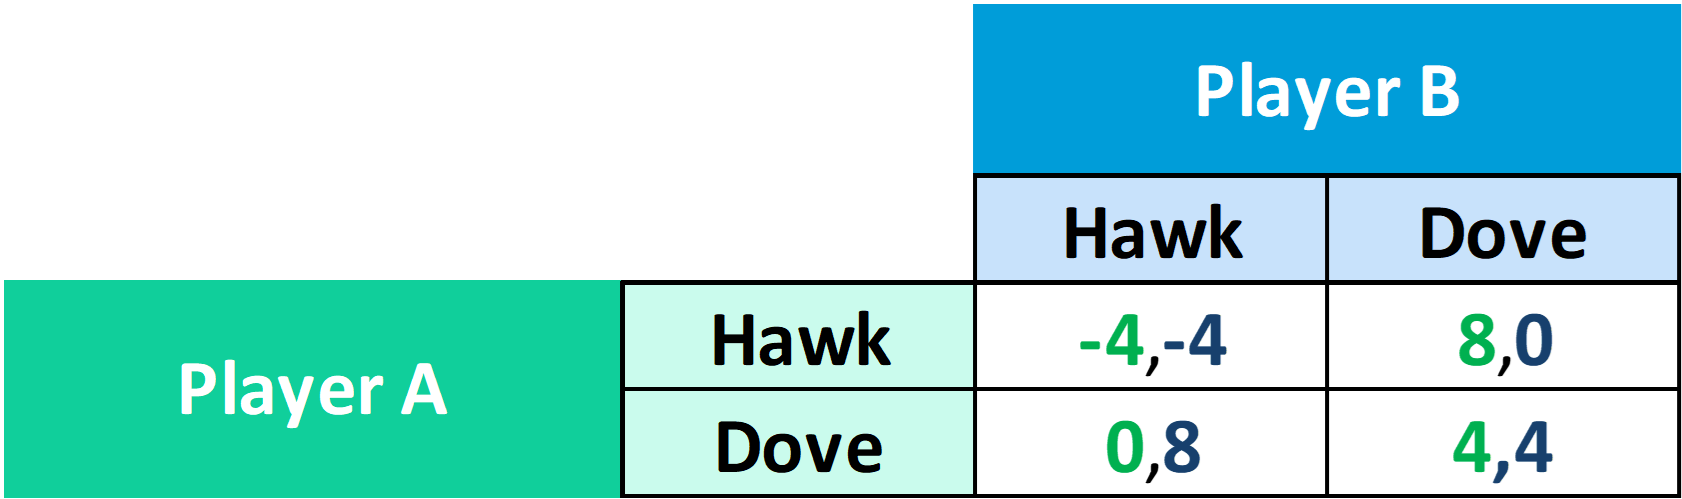

In [ ]:
A = np.array([[-4,8],[0,4]]) # A is the row player
B = np.array([[-4,0],[8,4]]) # B is the column player
game = nash.Game(A,B)

equilibria = game.support_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([0., 1.]))
(array([0., 1.]), array([1., 0.]))
(array([0.5, 0.5]), array([0.5, 0.5]))


# Simulación de estrategias

In [ ]:
import axelrod as axl

In [ ]:
players = (axl.Defector(), axl.Defector())   # Ambos jugadores usan la estrategia de delatar
match1 =   axl.Match(players, turns =10)     # Se juega 10 turnos seguidos
match1.play()

[(D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D)]

In [ ]:
players = (axl.TitForTat(), axl.Random())  # El jugador 1 juega titfortat y el  jugador 2 juega al azar
match2 =   axl.Match(players, turns =20)   # 20 veces
match2.play()

[(C, C),
 (C, D),
 (D, C),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, C),
 (C, D),
 (D, C),
 (C, D),
 (D, C),
 (C, D),
 (D, D),
 (D, D),
 (D, C),
 (C, D),
 (D, C)]

In [ ]:
match2.game

Axelrod game: (R,P,S,T) = (3, 1, 0, 5)

In [ ]:
match2.scores()

[(3, 3),
 (0, 5),
 (5, 0),
 (0, 5),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (5, 0),
 (0, 5),
 (5, 0),
 (0, 5),
 (5, 0),
 (0, 5),
 (1, 1),
 (1, 1),
 (5, 0),
 (0, 5),
 (5, 0)]

In [ ]:
print(match2.sparklines())

██ █      █ █ █   █ 
█ █      █ █ █   █ █


Documentación de la librería: https://axelrod.readthedocs.io/en/stable/index.html